#### Nasdaq Data: https://data.nasdaq.com/account/profile
#### - Multiple websites provides publish their data over nasdaq website 
#### - We are using the data provided by Quandl and is a free version to be used with help of API
#### - We created an account at Nasdaq to get a personal API key

In [52]:
##Quandl is imported to get free access of data from https://data.nasdaq.com/data/FRED-federal-reserve-economic-data
import quandl

In [53]:
## personal API generated by signing up to import the data 
quandl.ApiConfig.api_key = ''##removing my personal API

# 1. US Household Savings Data from 2015 to 2021
### Data Source: https://data.nasdaq.com/data/FRED-federal-reserve-economic-data

In [54]:
##Getting the data for US household savings for 7 Years
df_savings = quandl.get(["FRED/PMSAVE"],
                     trim_start="2015-1-1", trim_end="2021-10-01", collapse = 'monthly')
df_savings.columns = ['Savings']
df_savings.tail()

,Savings
Date,
2021-06-30,1713.2
2021-07-31,1931.9
2021-08-31,1809.8
2021-09-30,1475.6
2021-10-31,1321.7


In [55]:
#Data sanity checks: removing duplicates and checking info  
df_savings = df_savings.drop_duplicates()
df_savings.describe()

,Savings
count,81.000000
mean,1536.008642
std,1000.164934
min,927.700000
25%,1042.700000
50%,1160.900000
75%,1419.100000
max,6392.500000


In [56]:
## Data sanity checks for any NAN values
df_savings.isna().sum().sum()

0

There are no NAN values in the entire dataframe

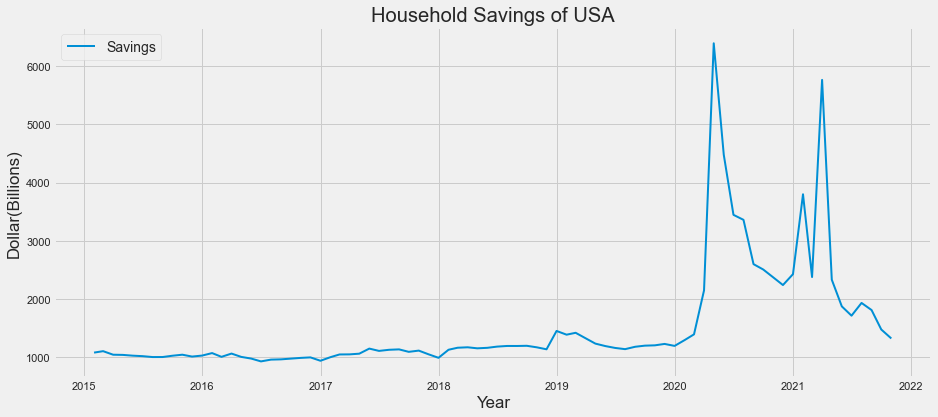

In [59]:
# Plotting the US Household savings for the past 7 years 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

cols = [col for col in df_savings.columns]
fig, ax = plt.subplots(1, 1, figsize=(14,6))
plt.style.use('fivethirtyeight')

for c in cols:
    ax.plot(c, linewidth=2, data=df_savings)
    ax.set_title('Household Savings of USA')
    plt.xlabel('Year')
    plt.ylabel('Dollar(Billions)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,loc='upper left', prop={"size":14})    
plt.show()

### Insights: Savings
### a. Household savings saw a sharp increase starting pre-covid period (Jan'20). 
### b. We saw another sharp increase in savings during the second wave in Jan'21
### c. However, we are seeing a gradual decrease in savings post covid and it seems to be trending towards the initial figures.

Since stimulus payments was one of the most important factors of increase in household savings. Hence, we wanted to analyze the stimulus payments made during the pandemic to the Economy and the US households. Stimulus payments were basically the checks sent by the U.S. government to taxpayers to boost their spending power and spur economic activity. Between March 2020 and March 2021, the U.S. government sent Americans three rounds of stimulus payments to provide relief for economic hardships caused by COVID-19

Data Source: https://www.pandemicoversight.gov/data-interactive-tools/interactive-dashboards/coronavirus-relief-fund 

In [62]:
## importing the data for stimulus payments

import pandas as pd

stimulus_payments_dataset = pd.read_csv("CRF details export.csv")

stimulus_payments_dataset.head()

,Prime recipient,Award_amount,Sub-recipient,Sub-recipient address1,Sub-recipient address2,Sub-recipient address3,City,State,Zip,Sub-recipient congressional district,Award number,Award type,Award description,Sub-award amount,Money spent to date,Project description,Project status,Spending_Category
0,ABSENTEE SHAWNEE TRIBE OF OKLAHOMA,33101482.3,NOT YET AVAILABLE FOR PUBLIC DISPLAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14911035.68,NaN,NaN,NaN,NaN
1,"ADAMS, COUNTY OF",90285974.4,ADAMS 12 FIVE STAR SCHOOLS,1500 E 128TH AVE,NaN,NaN,DENVER,CO,80241-2601,CO07,2,TRANSFER,Allocation to school district,8421866.47,339483.95,Allocation to school districts,Fully completed,Food Programs
2,"ADAMS, COUNTY OF",90285974.4,ADAMS 12 FIVE STAR SCHOOLS,1500 E 128TH AVE,NaN,NaN,DENVER,CO,80241-2601,CO07,2,TRANSFER,Allocation to school district,8421866.47,62238.24,Allocation to school districts,Fully completed,COVID-19 Testing and Contact Tracing
3,"ADAMS, COUNTY OF",90285974.4,ADAMS 12 FIVE STAR SCHOOLS,1500 E 128TH AVE,NaN,NaN,DENVER,CO,80241-2601,CO07,2,TRANSFER,Allocation to school district,8421866.47,167850.14,Allocation to school districts,Fully completed,Public Health Expenses
4,"ADAMS, COUNTY OF",90285974.4,ADAMS 12 FIVE STAR SCHOOLS,1500 E 128TH AVE,NaN,NaN,DENVER,CO,80241-2601,CO07,2,TRANSFER,Allocation to school district,8421866.47,275480.54,Allocation to school districts,Fully completed,Payroll for Public Health and Safety Employees


In [63]:
# Checking for any missing values in the dataframe 

stimulus_payments_dataset.isnull().values.any()

True

In [64]:
## Counting the missing values in each column of the dataframe

stimulus_payments_dataset.isnull().sum()

Prime recipient                              0
Award_amount                                 1
Sub-recipient                                0
Sub-recipient address1                     720
Sub-recipient address2                  154762
Sub-recipient address3                  163921
City                                       721
State                                      769
Zip                                        763
Sub-recipient congressional district       822
Award number                             34989
Award type                                 720
Award description                        34987
Sub-award amount                           117
Money spent to date                        719
Project description                      17397
Project status                           17390
Spending_Category                        14535
dtype: int64

In [65]:
## Counting the total missing values in the entire dataframe
stimulus_payments_dataset.isnull().sum().sum()

443333

In [66]:
## Finding out the various categories under which the Covid Relief Fund money was spent

spending_dataset= stimulus_payments_dataset.groupby('Spending_Category')['Money spent to date'].sum().sort_values(ascending= False).reset_index()


spending_dataset

,Spending_Category,Money spent to date
0,Payroll for Public Health and Safety Employees,9.245188e+09
1,"Economic Support (Other than Small Business, H...",8.893438e+09
2,Public Health Expenses,7.964035e+09
3,Small Business Assistance,7.165692e+09
4,Facilitating Distance Learning,6.859795e+09
...,...,...
5681,adjustment due to 1st quarter reporting,-1.203776e+07
5682,Removed for FEMA 100% match,-2.857150e+07
5683,Adjustment to deobligate FEMA PA match dollars...,-2.988602e+07
5684,Removing FEMA PA match dollars,-3.033919e+07


In [67]:
## Filtering the dataset to get the desired output 

subset_spending_dataset = spending_dataset.iloc[:10]

subset_spending_dataset

,Spending_Category,Money spent to date
0,Payroll for Public Health and Safety Employees,9.245188e+09
1,"Economic Support (Other than Small Business, H...",8.893438e+09
2,Public Health Expenses,7.964035e+09
3,Small Business Assistance,7.165692e+09
4,Facilitating Distance Learning,6.859795e+09
5,COVID-19 Testing and Contact Tracing,5.232198e+09
6,Medical Expenses,3.789586e+09
7,Personal Protective Equipment,3.665211e+09
8,Unemployment Benefits,3.255608e+09
9,Housing Support,3.166532e+09


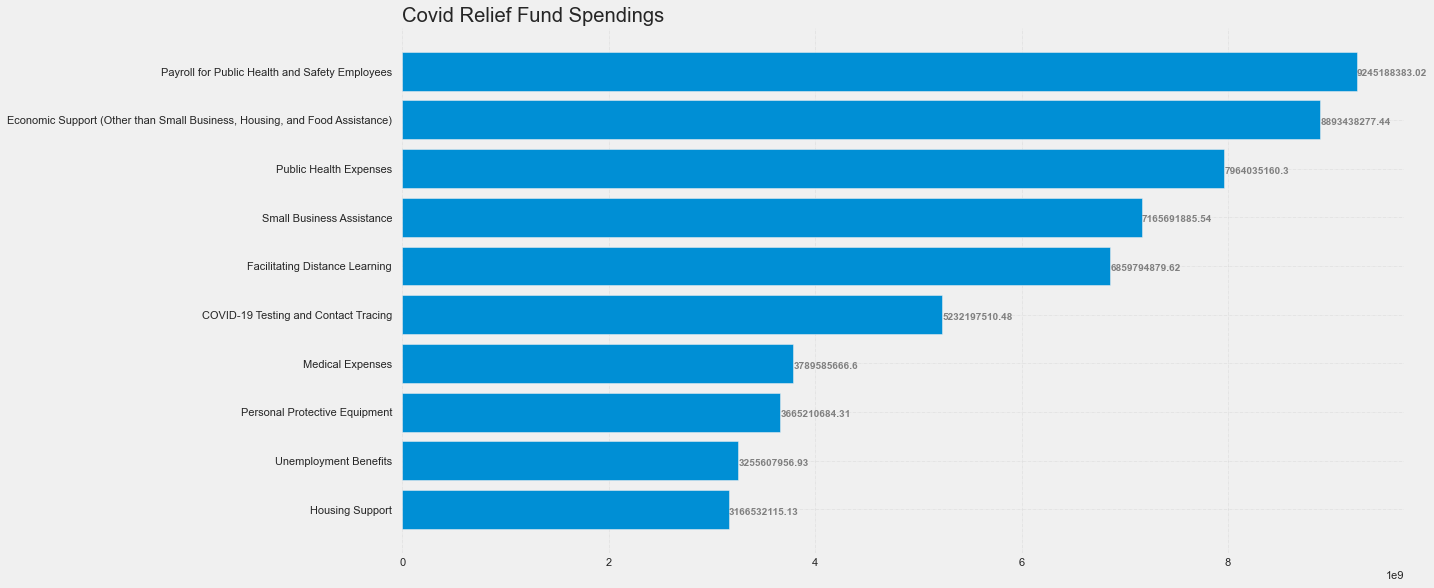

In [68]:
## Plotting the various categories under which the covid relief fund money was spent

spending_category = subset_spending_dataset['Spending_Category']

payment_amounts = subset_spending_dataset['Money spent to date']

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(spending_category,payment_amounts)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Covid Relief Fund Spendings',
             loc ='left', )

 
# Show Plot
plt.show()

In [70]:
## Finding out the relief payments for each state

statewise_relief = stimulus_payments_dataset.groupby('State')['Award_amount'].sum().sort_values(ascending= False).reset_index()

statewise_relief

,State,Award_amount
0,CA,1.155797e+14
1,TX,4.610973e+13
2,OH,2.837937e+13
3,IL,2.010790e+13
4,VA,1.560764e+13
...,...,...
64,AS,1.336598e+09
65,QC,1.250000e+09
66,NSW,1.250000e+09
67,MP,9.433897e+08


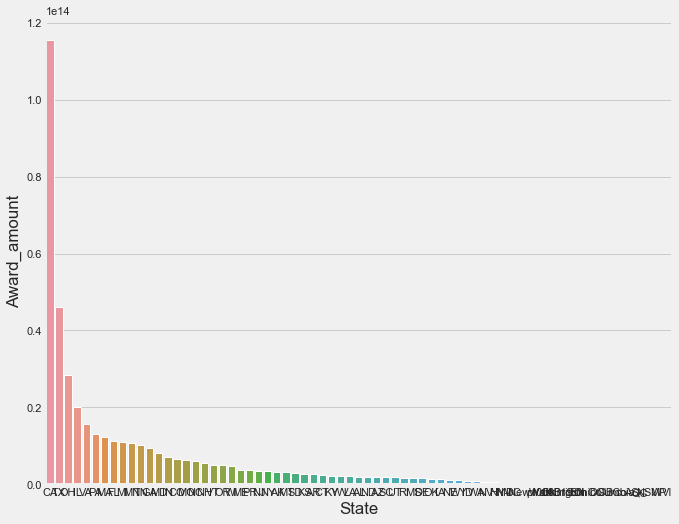

In [71]:
## Plotting the distribution of the relief payments statewise

import seaborn as sns

fig_dims = (10,8)
fig, ax = plt.subplots(figsize= fig_dims)
sns.set_theme(style="whitegrid")


ax = sns.barplot(x="State", y="Award_amount", data= statewise_relief )

In [72]:
## Finding out the status of the various projects under the Covid Relief Funds 

project_status = stimulus_payments_dataset['Project status'].value_counts().reset_index()
project_status

,index,Project status
0,Completed 50% or more,72379
1,Fully completed,70620
2,Less than 50% completed,6779
3,Not started,18


In [73]:
## Finding out the mean, maximum and minimum values of the amounts distributed among US Households

stimulus_payments_dataset.groupby(
     ['State','Prime recipient']
 ).agg(
     mean_award_amount = ('Award_amount','mean'),
     min_award_amount = ('Award_amount','min'),
     max_award_amount = ('Award_amount','max')
 ).reset_index()

,State,Prime recipient,mean_award_amount,min_award_amount,max_award_amount
0,100,EXECUTIVE OFFICE OF THE COMMONWEALTH OF PENNSY...,3.935169e+09,3.935169e+09,3.935169e+09
1,50319,IOWA DEPARTMENT MANAGEMENT,1.250000e+09,1.250000e+09,1.250000e+09
2,AK,"COMMONWEALTH OF VIRGINIA, DEPARTMENT OF THE TR...",3.109503e+09,3.109503e+09,3.109503e+09
3,AK,"PUBLIC SAFETY, ALASKA DEPT OF",1.250000e+09,1.250000e+09,1.250000e+09
4,AL,"ADMINISTRATION, MONTANA DEPARTMENT OF",1.250000e+09,1.250000e+09,1.250000e+09
...,...,...,...,...,...
1979,WY,"NORTH DAKOTA, STATE OF",1.250000e+09,1.250000e+09,1.250000e+09
1980,WY,STATE OF WYOMING,1.250000e+09,1.250000e+09,1.250000e+09
1981,Washington DC,GOVERNOR'S OFFICE,3.585391e+09,3.585391e+09,3.585391e+09
1982,co,"PERSONNEL AND ADMINISTRATION, COLORADO DEPARTM...",1.673850e+09,1.673850e+09,1.673850e+09


 ### We were able to deduce from our investigation that the state of California earned the largest payment for Covid relief. To resuscitate the economy, we utilized Python to determine the minimum, maximum, and mean amounts dispersed among US households and enterprises.

# 2. Personal Consumption Expenditure Data from 2015 to 2021

In [74]:
##Getting the data for consumer goods for last 7 years 
##Three main types of consumer goods: durable goods(refrigerators,televisions), nondurable goods(food items), and services(Recreation,entertainment


df_goods = quandl.get(["FRED/PCEDGC96", "FRED/PCENDC96","FRED/PCES"], \
    trim_start="2015-1-1", trim_end="2021-10-01", collapse = 'monthly')
df_goods.columns = ['Durable Goods', 'Non-Durable Goods','Services']
df_goods.tail()

,Durable Goods,Non-Durable Goods,Services
Date,,,
2021-06-30,2248.4,3402.2,10263.9
2021-07-31,2157.0,3351.9,10379.4
2021-08-31,2156.9,3415.6,10453.4
2021-09-30,2164.6,3428.9,10506.6
2021-10-31,2208.3,3443.1,10597.1


In [75]:
#Data sanity checks: removing duplicates and checking info  
df_goods = df_goods.drop_duplicates()
df_goods.describe()

,Durable Goods,Non-Durable Goods,Services
count,82.000000,82.000000,82.000000
mean,1700.990244,2935.439024,9292.475610
std,269.445022,209.304102,657.332115
min,1357.100000,2660.500000,8134.600000
25%,1491.575000,2767.175000,8726.925000
50%,1658.650000,2892.700000,9316.300000
75%,1804.975000,3011.950000,9757.025000
max,2433.600000,3443.100000,10597.100000


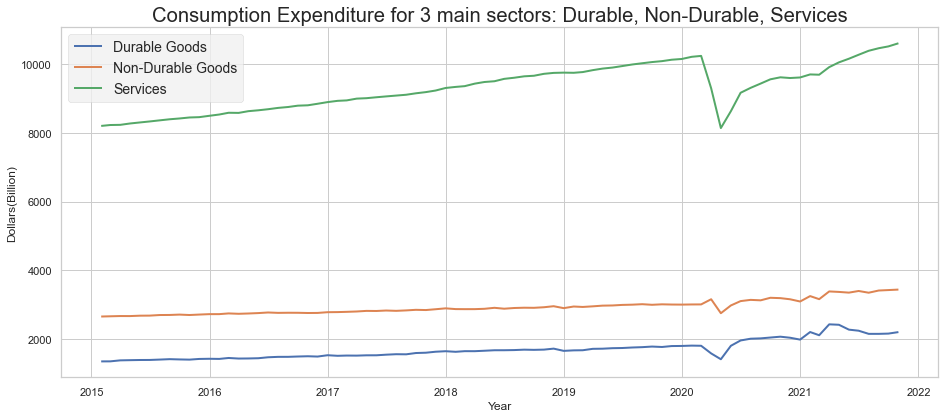

In [76]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

cols = [col for col in df_goods.columns]
fig, ax = plt.subplots(1, 1, figsize=(14,6))
plt.style.use('fivethirtyeight')

for c in cols:
    ax.plot(c, linewidth=2, data=df_goods)
    ax.set_title('Consumption Expenditure for 3 main sectors: Durable, Non-Durable, Services')
    plt.xlabel('Year')
    plt.ylabel('Dollars(Billion)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,loc='upper left', prop={"size":14})    
plt.show()

### Insights: Expenditures
### a. There is a gradual increase in expenditure since 2015 for all 3 personal expenditure sectors  
### b. We saw sharp decrease in expenditure during the first wave of covid in 2020. 
### c. If we look closely at the Non-durable sector, we saw a slight increase during 2020 which seems to show that people started accumulating non-durable goods. No such trends were seen for Durable goods/ services.

# 3.(a) Unemployment Data for different races from 2015 to 2021

In [77]:
##Getting the data for different races for last 7 years  
df_race = quandl.get(["FRED/UNRATE", "FRED/LNS14000003", "FRED/LNS14000006", "FRED/LNS14000009", "FRED/LNU04032183"],
                     trim_start="2015-1-1", trim_end="2021-10-01", collapse = 'monthly')
df_race.columns = ['Unemployment', 'Unemp_White', 'Unemp_Black', 'Unemp_Hispanic','Unemp_Asian']
df_race.tail()

,Unemployment,Unemp_White,Unemp_Black,Unemp_Hispanic,Unemp_Asian
Date,,,,,
2021-06-30,5.9,5.2,9.2,7.4,5.9
2021-07-31,5.4,4.8,8.2,6.6,5.5
2021-08-31,5.2,4.5,8.8,6.4,4.6
2021-09-30,4.8,4.2,7.9,6.3,4.1
2021-10-31,4.6,4.0,7.9,5.9,4.1


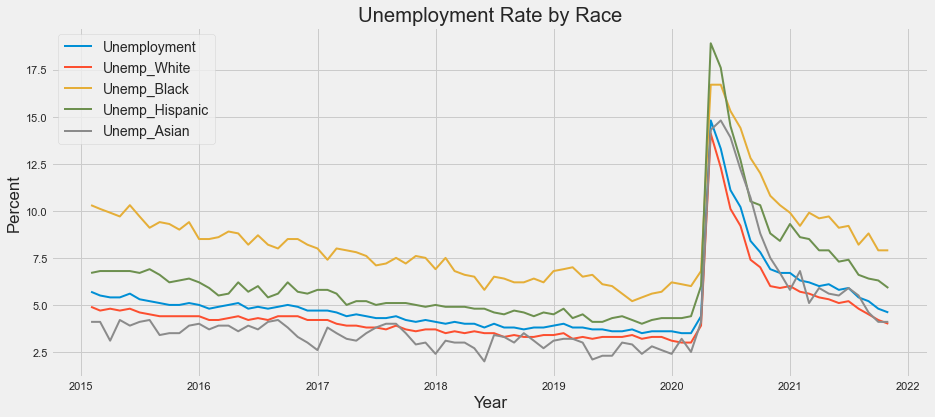

In [78]:
cols = [col for col in df_race.columns]
fig, ax = plt.subplots(1, 1, figsize=(14,6))
plt.style.use('fivethirtyeight')

for c in cols:
    ax.plot(c, linewidth=2, data=df_race)
    ax.set_title('Unemployment Rate by Race')
    plt.xlabel('Year')
    plt.ylabel('Percent')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,loc='upper left', prop={"size":14})    
plt.show()

### Insights: 
### a. Unemployment rate has been decreasing since 2015 to 2020
### b. Sharp increase in unemployment for all races during covid, however hispanic population had highest percentage of unemployment during the covid time. 
### c. Post Covid (by Oct'21) last month, Black race has the highest unemployed population and Asian/White being the least

# 3.(b) Unemployment Data for different genders from 2015 to 2021

In [79]:
##Getting the data for gender for last 7 years 
df_gender = quandl.get(["FRED/LNS14000001", "FRED/LNS14000002"], \
    trim_start="2015-1-1", trim_end="2021-10-01", collapse = 'monthly')
df_gender.columns = ['Unemp_Men', 'Unemp_Women']
df_gender.tail()

,Unemp_Men,Unemp_Women
Date,,
2021-06-30,6.0,5.7
2021-07-31,5.6,5.2
2021-08-31,5.4,5.0
2021-09-30,5.0,4.5
2021-10-31,4.5,4.7


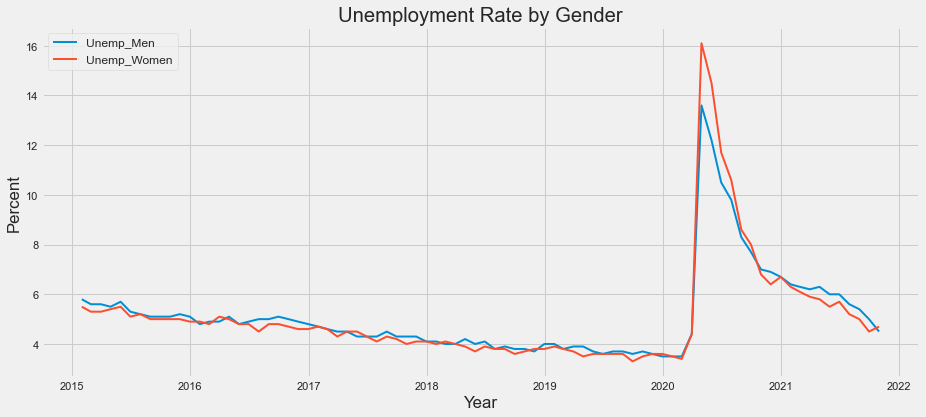

In [80]:
cols = [col for col in df_gender.columns]
fig, ax = plt.subplots(1, 1, figsize=(14,6))
plt.style.use('fivethirtyeight')

for c in cols:
    ax.plot(c, linewidth=2, data=df_gender)
    ax.set_title('Unemployment Rate by Gender')
    plt.xlabel('Year')
    plt.ylabel('Percent')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,loc='upper left', prop={"size":12})    
plt.show()

### Insights: 
### (a) As expected, unemployment rate has been decreasing since 2015 to 2020 even across genders.
### (b) However, women were more affected than men during covid as we see a higher % of unemployment rate among women 
### (c) Post-covid (last month till Oct'21) the unemployment rate for both men and women are similar as in the earlier years

###  Conclusion:Aggregate personal savings showed a sudden increase at the start of the pandemic. There was a gradual decrease in savings post Covid.Consumption expenditure showed a decrease for all sectors durable non durable and services. With time the demand for durable goods rose due to imposed lockdowns and social distancing guidelines.Unemployment rate increased due to loss of jobs during the pandemic



